# Q2
## This file contains common feature engineering and/or data preparation tasks for the "2017.csv" dataset and the "data.csv" question

The Congress_White_House.csv link:  
https://raw.githubusercontent.com/mathcoder3141/blog-data-files/master/Congress_White_House.csv    
is 404: Not Found

In [68]:
import numpy as np
import pandas as pd

data = pd.read_csv("2017.csv")
data

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT
...,...,...,...,...,...
372,"Winfree, Paul L.",Employee,"$155,000.00",Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DEPUTY D...
373,"Worthington, Ross P.",Employee,"$130,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ADVISOR...
374,"Young, Jr., Reginald D.",Employee,"$72,648.00",Per Annum,SENIOR RECORDS MANAGEMENT ANALYST
375,"Zadrozny, John A.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR JUSTICE...


### Deleting Rows with Empty Cells in POSITION TITLE

In [69]:
data['POSITION TITLE'].replace('', np.nan, inplace=True)
data.dropna(subset=['POSITION TITLE'], inplace=True)

data

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT
...,...,...,...,...,...
372,"Winfree, Paul L.",Employee,"$155,000.00",Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DEPUTY D...
373,"Worthington, Ross P.",Employee,"$130,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ADVISOR...
374,"Young, Jr., Reginald D.",Employee,"$72,648.00",Per Annum,SENIOR RECORDS MANAGEMENT ANALYST
375,"Zadrozny, John A.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR JUSTICE...


### Catagroize POSITION TITLE and Make a New Column Called TITLE

In [70]:
data['TITLE'] = data['POSITION TITLE']

data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('ASSISTANT'), 'ASISTANT', data['TITLE'])
data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('SPECIAL ASSISTANT'), 'SPECIAL ASSISTANT', data['TITLE'])
data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('EXECUTIVE ASSISTANT'), 'EXECUTIVE ASSISTANT', data['TITLE'])
data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('DEPUTY ASSISTANT'), 'DEPUTY ASSISTANT', data['TITLE'])

data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('ADVISOR'), 'ADVISOR', data['TITLE'])

data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('DIRECTOR'), 'DIRECTOR', data['TITLE'])
data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('ASSOCIATE DIRECTOR'), 'ASSOCIATE DIRECTOR', data['TITLE'])
data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('DEPUTY DIRECTOR'), 'DEPUTY DIRECTOR', data['TITLE'])

data['TITLE'] = np.where(data['POSITION TITLE'].str.contains('SUPERVISOR'), 'SUPERVISOR', data['TITLE'])

data

# it can be better catagroized in detail


,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE,TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,DIRECTOR
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,SPECIAL ASSISTANT
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,DEPUTY DIRECTOR
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,DIRECTOR
...,...,...,...,...,...,...
372,"Winfree, Paul L.",Employee,"$155,000.00",Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DEPUTY D...,DEPUTY DIRECTOR
373,"Worthington, Ross P.",Employee,"$130,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ADVISOR...,ADVISOR
374,"Young, Jr., Reginald D.",Employee,"$72,648.00",Per Annum,SENIOR RECORDS MANAGEMENT ANALYST,SENIOR RECORDS MANAGEMENT ANALYST
375,"Zadrozny, John A.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR JUSTICE...,SPECIAL ASSISTANT


### Changing SALARY to Numeric Numbers

In [71]:
data['SALARY'] = data['SALARY'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
data['SALARY'] = data['SALARY'].apply(np.int64)

data

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE,TITLE
0,"Alexander, Monica K.",Employee,56000,Per Annum,EXECUTIVE ASSISTANT,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,95000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,DIRECTOR
2,"Amin, Stacy C.",Employee,140000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,SPECIAL ASSISTANT
3,"Andersen, Whitney N.",Employee,94000,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,DEPUTY DIRECTOR
4,"Anderson, Alexander J.",Employee,77000,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,DIRECTOR
...,...,...,...,...,...,...
372,"Winfree, Paul L.",Employee,155000,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DEPUTY D...,DEPUTY DIRECTOR
373,"Worthington, Ross P.",Employee,130000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ADVISOR...,ADVISOR
374,"Young, Jr., Reginald D.",Employee,72648,Per Annum,SENIOR RECORDS MANAGEMENT ANALYST,SENIOR RECORDS MANAGEMENT ANALYST
375,"Zadrozny, John A.",Employee,95000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR JUSTICE...,SPECIAL ASSISTANT


### Delete Rows Where SALARY is 0

In [72]:
data = data[data['SALARY'] > 0]

data

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE,TITLE
0,"Alexander, Monica K.",Employee,56000,Per Annum,EXECUTIVE ASSISTANT,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,95000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,DIRECTOR
2,"Amin, Stacy C.",Employee,140000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,SPECIAL ASSISTANT
3,"Andersen, Whitney N.",Employee,94000,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,DEPUTY DIRECTOR
4,"Anderson, Alexander J.",Employee,77000,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,DIRECTOR
...,...,...,...,...,...,...
372,"Winfree, Paul L.",Employee,155000,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DEPUTY D...,DEPUTY DIRECTOR
373,"Worthington, Ross P.",Employee,130000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ADVISOR...,ADVISOR
374,"Young, Jr., Reginald D.",Employee,72648,Per Annum,SENIOR RECORDS MANAGEMENT ANALYST,SENIOR RECORDS MANAGEMENT ANALYST
375,"Zadrozny, John A.",Employee,95000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR JUSTICE...,SPECIAL ASSISTANT


## data.csv

In [73]:
import matplotlib.pyplot as plt

data2 = np.genfromtxt("data.csv", delimiter=",")


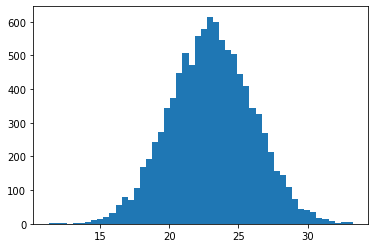

In [74]:
plt.hist(data2[:,1], bins=50)
plt.show()

In [75]:
# mean
np.mean(data2[:,1])

23.036075172576503

In [76]:
# std
np.std(data2[:,1])

2.9951465243813162

The result shows a normal distribution with mean 23.036075172576503 and std 2.995296292940271. 